In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

(ds_train,ds_test), ds_info = tfds.load(
    'beans',
    split =['train','test'],
    #shuffle_files=True,
    as_supervised=True, 
    with_info=True,  #it is used for ds_info 
)
print(ds_train)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteOX8DTX/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteOX8DTX/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteOX8DTX/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:

#fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)
def normalize_image(image,label):
  return tf.cast(image, tf.float32)/255.0,label

ds_train=ds_train.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)
ds_train=ds_train.cache()
ds_train=ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train=ds_train.batch(128)
ds_train=ds_train.prefetch(tf.data.AUTOTUNE)

ds_test=ds_test.map(normalize_image, num_parallel_calls=tf.data.AUTOTUNE)
# ds_test=ds_test.shuffle(ds_info.splits["train"].num_examples)
ds_test=ds_test.batch(128)
ds_test=ds_test.cache()
ds_test=ds_test.prefetch(tf.data.AUTOTUNE)

# training the dataset    #Method (1)
adam = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)
model = Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(40,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(45,activation='relu'))
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(150,activation='relu'))
model.add(layers.Dense(45,activation='relu'))
model.add(layers.Dense(150,activation='relu'))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(70,activation=tf.nn.softmax))
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(ds_train,epochs=50,validation_data=ds_test)
result=model.evaluate(ds_test,verbose=2)
print(result[1])



## Method two
# logisticRegr = LogisticRegression(solver = 'lbfgs')
# logisticRegr.fit(X,Y)
# predictions = logisticRegr.predict(ds_test)
# score = logisticRegr.score(ds_test)
# print(score)





Epoch 1/50
9/9 [==============================] - 9s 274ms/step - loss: 3.6268 - accuracy: 0.1731 - val_loss: 3.0151 - val_accuracy: 0.3359
Epoch 2/50
9/9 [==============================] - 1s 155ms/step - loss: 2.7600 - accuracy: 0.3337 - val_loss: 2.3778 - val_accuracy: 0.3359
Epoch 3/50
9/9 [==============================] - 1s 154ms/step - loss: 2.0965 - accuracy: 0.3337 - val_loss: 1.7284 - val_accuracy: 0.3359
Epoch 4/50
9/9 [==============================] - 1s 152ms/step - loss: 1.6181 - accuracy: 0.3230 - val_loss: 1.4747 - val_accuracy: 0.3281
Epoch 5/50
9/9 [==============================] - 1s 151ms/step - loss: 1.4212 - accuracy: 0.3733 - val_loss: 1.3205 - val_accuracy: 0.4609
Epoch 6/50
9/9 [==============================] - 1s 153ms/step - loss: 1.2774 - accuracy: 0.4536 - val_loss: 1.1450 - val_accuracy: 0.5781
Epoch 7/50
9/9 [==============================] - 1s 153ms/step - loss: 1.1117 - accuracy: 0.5164 - val_loss: 1.0674 - val_accuracy: 0.5625
Epoch 8/50
9/9 [====

KeyError: ignored

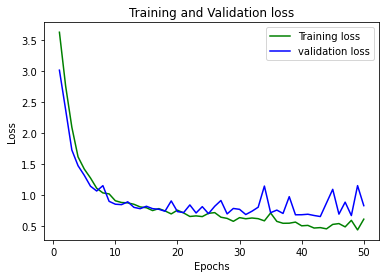

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()